In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Generating synthetic quarterly time series data
np.random.seed(42)
start_date = '2012-01-01'
end_date = '2023-09-30'
date_range = pd.date_range(start=start_date, end=end_date, freq='Q')

In [4]:
data = {'Date': date_range,
        'CashFlow': np.random.normal(100000, 5000, len(date_range)),
        'Inflation': np.random.uniform(0.02, 0.05, len(date_range)),
        'GDP': np.random.uniform(0.01, 0.03, len(date_range))}

In [5]:
df = pd.DataFrame(data)

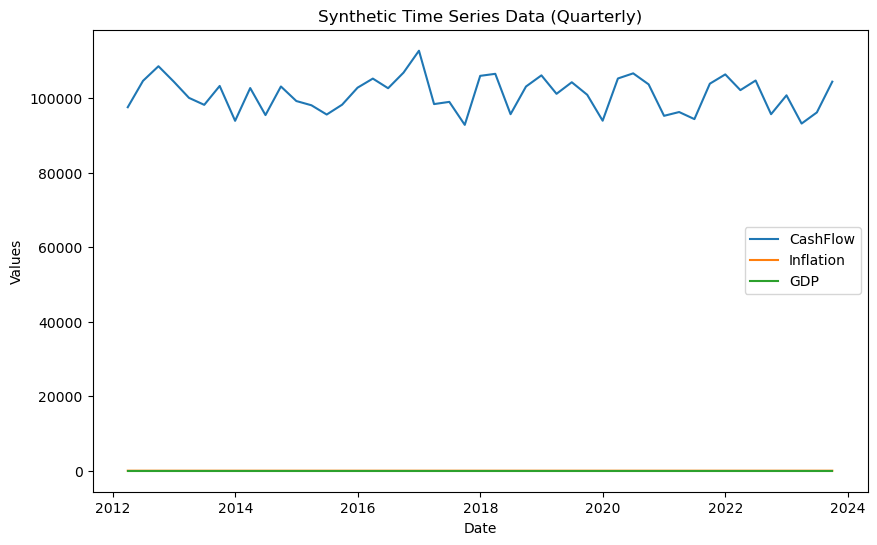

In [6]:
# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['CashFlow'], label='CashFlow')
plt.plot(df['Date'], df['Inflation'], label='Inflation')
plt.plot(df['Date'], df['GDP'], label='GDP')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Synthetic Time Series Data (Quarterly)')
plt.legend()
plt.show()

In [7]:
# Merge the data into a single DataFrame
df.set_index('Date', inplace=True)
exog_variables = df[['Inflation', 'GDP']]

In [9]:
# Fit SARIMAX model
order = (1, 1, 1)  
seasonal_order = (1, 1, 1, 4)  
model = sm.tsa.SARIMAX(df['CashFlow'], exog=exog_variables, order=order, seasonal_order=seasonal_order)
results = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [10]:
# Forecast future values
forecast_periods = 4  
forecast = results.get_forecast(steps=forecast_periods, exog=exog_variables.tail(forecast_periods))
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')
forecast_df = pd.DataFrame(index=forecast_index, data={'Forecast': forecast.predicted_mean})

In [11]:
forecast_df

,Forecast
2023-12-31,110484.911958
2024-03-31,105803.998407
2024-06-30,108339.670209
2024-09-30,114309.770369


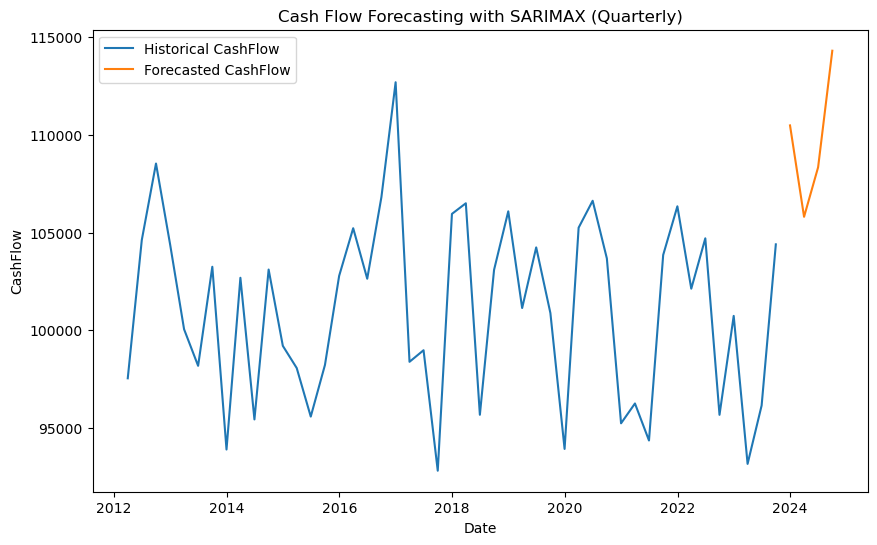

In [12]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CashFlow'], label='Historical CashFlow')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted CashFlow')
plt.xlabel('Date')
plt.ylabel('CashFlow')
plt.title('Cash Flow Forecasting with SARIMAX (Quarterly)')
plt.legend()
plt.show()